<a href="https://colab.research.google.com/github/kungfumas/stbi/blob/master/berhasil_Google_Search_Trends_2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import and Set Up

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
import datetime

In [3]:
!pip install pytrends

In [4]:
import pandas as pd                        
from pytrends.request import TrendReq
pytrend = TrendReq(hl='en-US', tz=300, geo='ID')

# Top charts

In [5]:
# Get Google Top Charts
df = pytrend.top_charts(date=2020, hl='en-US', tz=300, geo='ID')
df

,title,exploreQuery
0,Ghosting,
1,Gabut,
2,Lockdown,
3,Rebahan,
4,WFH,
5,Resesi,
6,Kuota Belajar,
7,Virus Corona,
8,PSBB,
9,Among Us,


In [6]:
# Get Google Hot Trends data
df = pytrend.trending_searches(pn='indonesia')
df

,0
0,Klasemen Liga Inggris
1,Gedung Cyber kebakaran
2,Bologna vs Roma
3,Sassuolo vs Napoli
4,EPL
5,Persipura Jayapura vs Bhayangkara FC
6,West Ham vs Brighton
7,Southampton vs Leicester
8,Sscasn.bkn.go.id 2021
9,Bibit


# Deepdive Top Searches

In [7]:
kw_list = ['ghosting','gabut','lockdown','rebahan','wfh','resesi','kuota belajar','virus corona','psbb','among us']

In [8]:
trends_df = pd.DataFrame()
for i in kw_list:
   ##build out query
   temp_df = pd.DataFrame()
   pytrend.build_payload([i], geo='ID', cat=0,timeframe='2020-01-01 2020-12-01')
   
   ##save trend to dictionary
   temp_df = pytrend.interest_over_time()
   temp_df['kw'] = i
   temp_df.reset_index(level=0, inplace=True)
   temp_df.columns = ['date', 'value', 'isPartial', 'kw']

   trends_df = pd.concat([trends_df,temp_df[['date','value','kw']]])

trends_df

,date,value,kw
0,2020-01-05,7,ghosting
1,2020-01-12,10,ghosting
2,2020-01-19,3,ghosting
3,2020-01-26,7,ghosting
4,2020-02-02,24,ghosting
...,...,...,...
43,2020-11-01,39,among us
44,2020-11-08,33,among us
45,2020-11-15,29,among us
46,2020-11-22,25,among us


In [9]:
trends_df['date'] = pd.to_datetime(trends_df.date,format='%Y-%m-%d')

In [10]:
trends_df = trends_df.reset_index(drop=True)

In [11]:
def func(row):
    if row['kw'] == 'gabut':
        return 'gabut, rebahan'
    elif row['kw'] =='rebahan':
        return 'gabut, rebahan' 
    elif row['kw'] =='psbb':
        return 'psbb, lockdown' 
    elif row['kw'] =='lockdown':
        return 'psbb, lockdown' 
    else:
        return row['kw']

trends_df['group'] = trends_df.apply(func, axis=1)

In [12]:
trends_df = trends_df.reset_index(drop=True)

In [13]:
trends_df.columns.duplicated().any()

False

In [14]:
trends_df.index.duplicated()

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

Text(0.5, 1.0, 'Trend Score by Keyword')

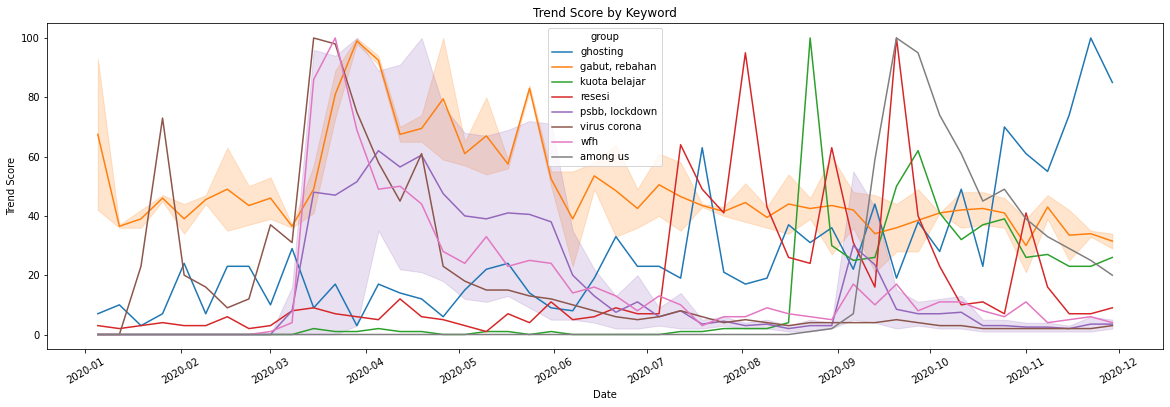

In [15]:
# create plot

f, ax = plt.subplots(figsize=(20, 6))

sns.set_color_codes("pastel")
sns.lineplot(x="date", y="value", data=trends_df.sort_values("date", ascending=True), hue="group",color="b")

plt.xlabel('Date')
plt.ylabel('Trend Score')
plt.xticks(rotation=30)
plt.title('Trend Score by Keyword')

# Covid deepdive

## Search by Region

### Exploration

In [16]:
kw_list = ['ghosting','gabut','lockdown','rebahan','wfh','resesi','kuota belajar','virus corona','psbb','among us']

city_df = pd.DataFrame()
for i in kw_list:
   ##build out query
   temp_df = pd.DataFrame()
   pytrend.build_payload([i], geo='ID', cat=0,timeframe='2020-01-01 2020-12-01')
   
   ##save trend to dictionary
   temp_df = pytrend.interest_by_region(resolution='CITY', inc_low_vol=True, inc_geo_code=False)
   temp_df['kw'] = i
   temp_df.reset_index(level=0, inplace=True)
   temp_df.columns = ['geoname', 'value', 'kw']

   city_df = pd.concat([city_df,temp_df[['geoname','value','kw']]])

city_df

,geoname,value,kw
0,Aceh,64,ghosting
1,Bali,46,ghosting
2,Bangka Belitung Islands,78,ghosting
3,Banten,84,ghosting
4,Bengkulu,66,ghosting
...,...,...,...
29,West Kalimantan,91,among us
30,West Nusa Tenggara,52,among us
31,West Papua,39,among us
32,West Sulawesi,61,among us


In [17]:
city_df.geoname.unique()

array(['Aceh', 'Bali', 'Bangka Belitung Islands', 'Banten', 'Bengkulu',
       'Central Java', 'Central Kalimantan', 'Central Sulawesi',
       'East Java', 'East Kalimantan', 'East Nusa Tenggara', 'Gorontalo',
       'Jambi', 'Lampung', 'Maluku', 'North Kalimantan', 'North Maluku',
       'North Sulawesi', 'North Sumatra', 'Papua', 'Riau', 'Riau Islands',
       'South East Sulawesi', 'South Kalimantan', 'South Sulawesi',
       'South Sumatra', 'Special Capital Region of Jakarta',
       'Special Region of Yogyakarta', 'West Java', 'West Kalimantan',
       'West Nusa Tenggara', 'West Papua', 'West Sulawesi',
       'West Sumatra'], dtype=object)

In [18]:
def region_name(row):
    if row['geoname'] == 'Special Capital Region of Jakarta':
        return 'Jakarta'
    elif row['geoname'] =='Banten' or row['geoname'] =='Central Java' or row['geoname'] =='East Java' or row['geoname'] =='West Java' or row['geoname'] =='Special Region of Yogyakarta':
        return 'Java excl Jakarta' 
    elif row['geoname'] =='Aceh' or row['geoname'] =='Bangka Belitung Islands' or row['geoname'] =='Bengkulu' or row['geoname'] =='Jambi' or row['geoname'] =='Lampung' or row['geoname'] =='North Sumatra' or row['geoname'] =='Riau' or row['geoname'] =='Riau Islands' or row['geoname'] =='South Sumatra' or row['geoname'] =='West Sumatra':
        return 'Sumatera' 
    elif row['geoname'] =='Central Sulawesi' or row['geoname'] =='Gorontalo' or row['geoname'] =='North Sulawesi' or row['geoname'] =='South East Sulawesi' or row['geoname'] =='South Sulawesi' or row['geoname'] =='West Sulawesi':
        return 'Sulawesi' 
    elif row['geoname'] =='Central Kalimantan' or row['geoname'] =='East Kalimantan' or row['geoname'] =='North Kalimantan' or row['geoname'] =='South Kalimantan' or row['geoname'] =='West Kalimantan':
        return 'Kalimantan'
    elif row['geoname'] =='Bali' or row['geoname'] =='East Nusa Tenggara' or row['geoname'] =='Maluku' or row['geoname'] =='North Maluku' or row['geoname'] =='Papua' or row['geoname'] =='West Nusa Tenggara' or row['geoname'] =='West Papua':
        return 'Nusa Tenggara & Papua'  
    else:
        return 'others'

city_df['region'] = city_df.apply(region_name, axis=1)
city_df

,geoname,value,kw,region
0,Aceh,64,ghosting,Sumatera
1,Bali,46,ghosting,Nusa Tenggara & Papua
2,Bangka Belitung Islands,78,ghosting,Sumatera
3,Banten,84,ghosting,Java excl Jakarta
4,Bengkulu,66,ghosting,Sumatera
...,...,...,...,...
29,West Kalimantan,91,among us,Kalimantan
30,West Nusa Tenggara,52,among us,Nusa Tenggara & Papua
31,West Papua,39,among us,Nusa Tenggara & Papua
32,West Sulawesi,61,among us,Sulawesi


In [19]:
region_df = pd.DataFrame()
region_df = city_df.groupby(['region','kw']).value.mean().reset_index()
region_df.head()

,region,kw,value
0,Jakarta,among us,63.0
1,Jakarta,gabut,35.0
2,Jakarta,ghosting,59.0
3,Jakarta,kuota belajar,24.0
4,Jakarta,lockdown,100.0


### Result

In [20]:
!pip install squarify

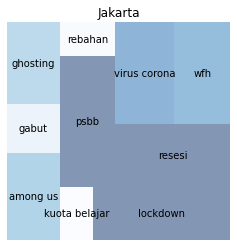

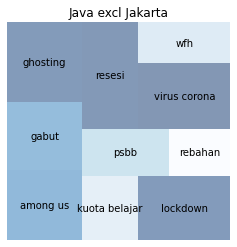

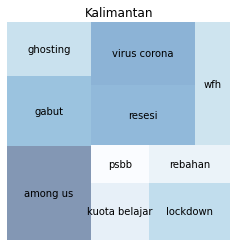

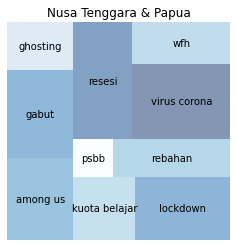

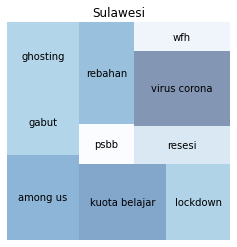

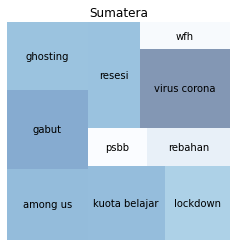

In [21]:
import matplotlib
import squarify # pip install squarify

for i in region_df.region.unique():
  temp_city_df = region_df.loc[region_df['region'] == i]

  # create a color palette, mapped to these values
  cmap = matplotlib.cm.Blues
  mini=min(temp_city_df['value'])
  maxi=max(temp_city_df['value'])
  norm = matplotlib.colors.Normalize(vmin=mini, vmax=maxi)
  colors = [cmap(norm(value)) for value in temp_city_df['value']]

  fig, ax = plt.subplots(1, figsize = (4,4))
  squarify.plot(sizes=temp_city_df['value'], 
                label=temp_city_df['kw'], 
                alpha=.5,
                color = colors)
  plt.title(i)
  plt.axis('off')
  plt.show()

## Related Queries and Topics

### Exploration

In [22]:
# Get Google Keyword Suggestions
pytrend.build_payload(kw_list=['virus corona'], geo='ID', cat=0,timeframe='2020-01-01 2020-12-01')
keywords = pytrend.suggestions(keyword='virus corona')
df = pd.DataFrame(keywords)
df.drop(columns= 'mid') 

,title,type
0,Coronavirus disease 2019,Disease
1,Coronavirus,Virus
2,Severe acute respiratory syndrome coronavirus 2,Virus
3,2020 coronavirus pandemic in Singapore,Event
4,Severe acute respiratory syndrome coronavirus,Virus


In [23]:
kw_list = ['ghosting','gabut','lockdown','rebahan','wfh','resesi','kuota belajar','virus corona','psbb','among us']

suggestion = pd.DataFrame()
for i in kw_list:
   ##build out query
   pytrend.build_payload([i], geo='ID', cat=0,timeframe='2020-01-01 2020-12-01')
   
   ##save trend to dictionary
   temp_df = pd.DataFrame(pytrend.suggestions(keyword=i))
   temp_df['kw'] = i
   temp_df.reset_index(level=0, inplace=False)

   suggestion = pd.concat([suggestion,temp_df])

suggestion

,mid,title,type,kw
0,/g/11b7_r92z7,Ghosting,Topic,ghosting
1,/m/09d8d8,Ghosting,Topic,ghosting
2,/g/11fpj82f4j,Ghosting: The Spirit of Christmas,Film,ghosting
3,/g/120x601v,Ghosting,Musical group,ghosting
4,/g/1s05nwvt9,Ghosting,Song by Secret Rivals,ghosting
0,/m/03h_dfr,Massimo Gabutti,Entrepreneur,gabut
0,/m/07l88z,Lockdown,Topic,lockdown
1,/m/012659r0,12 Rounds 3: Lockdown,2015 film,lockdown
2,/m/0hqyk,Half Past Dead,2002 film,lockdown
3,/g/11d_8bffh_,Kundali Bhagya,Drama series,lockdown


In [30]:
# Related Queries, returns a dictionary of dataframes
related_queries = pytrend.related_queries()

In [31]:
related_queries

{'among us': {'rising':                       query    value
  0            among us cheat  1103450
  1                  impostor   616250
  2         among us impostor   592900
  3     download mod among us   523500
  4           among us gambar   519350
  5           gambar among us   497850
  6             among us skin   337750
  7             skin among us   324500
  8        cara main among us   283450
  9           among us adalah   266950
  10    mod among us impostor   262450
  11       among us indonesia   249350
  12     among us pc download   235950
  13  download among us cheat   217250
  14    cara bermain among us   215050
  15               among pink   210700
  16       among us cheat apk   209550
  17  among us cheat impostor   203850
  18        among us mod menu   196300
  19  cheat among us impostor   195600
  20            among us pink   183950
  21       cheat among us apk   179100
  22            foto among us   168200
  23   download game among us   133250
  2

In [32]:
kw = 'among us'
# for rising related queries
related_queries_rising = related_queries.get(kw).get('rising')
# for top related queries
related_queries_top = related_queries.get(kw).get('top')

In [33]:
related_queries_rising

,query,value
0,among us cheat,1103450
1,impostor,616250
2,among us impostor,592900
3,download mod among us,523500
4,among us gambar,519350
5,gambar among us,497850
6,among us skin,337750
7,skin among us,324500
8,cara main among us,283450
9,among us adalah,266950


In [ ]:
related_queries_top

In [ ]:
df_clean = pd.DataFrame()
df_clean = related_queries_top
df_clean['clean_query'] = df_clean['query'].str.replace('virus', '').str.replace('corona', '')
df_clean

In [ ]:
df_clean["clean_query"]=df_clean["clean_query"].str.split(" ")
df_clean = df_clean.explode("clean_query").reset_index(drop=True)
df_clean

In [ ]:
df_cloud = pd.DataFrame(df_clean.groupby(['clean_query']).value.sum()).reset_index()
df_cloud

In [ ]:
d = {}
for a, x in df_cloud.values:
    d[a] = x

import matplotlib.pyplot as plt
from wordcloud import WordCloud

wordcloud = WordCloud()
wordcloud.generate_from_frequencies(frequencies=d)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:
kw_list = ['ghosting','gabut','lockdown','rebahan','wfh','resesi','kuota belajar','virus corona','psbb','among us']

related_df = pd.DataFrame()
for i in kw_list:
   # Related Queries, returns a dictionary of dataframes
   pytrend.build_payload([i], geo='ID', cat=0,timeframe='2020-01-01 2020-12-01')
   related_queries = pytrend.related_queries()
   related_queries_top = related_queries.get(i).get('top')
   
   ##save trend to dictionary
   temp_df = pd.DataFrame()
   temp_df = related_queries_top
   temp_df['clean_query'] = temp_df['query'].str.replace(i, '').str.split(" ")
   temp_df = temp_df.explode("clean_query").reset_index(drop=True)
   temp_df['kw'] = i
   temp_df.reset_index(level=0, inplace=False)

   temp_sum_df = pd.DataFrame()
   temp_sum_df['kw'] = i
   temp_sum_df = pd.DataFrame(temp_df.groupby(['clean_query','kw']).value.sum()).reset_index()

   related_df = pd.concat([related_df,temp_sum_df])

related_df

### Result

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

for i in related_df.kw.unique():
  df_cloud = related_df.loc[related_df['kw'] == i]
  df_cloud = df_cloud.drop(columns= 'kw') 

  d = {}
  for a, x in df_cloud.values:
      d[a] = x

  wordcloud = WordCloud()
  wordcloud.generate_from_frequencies(frequencies=d)
  plt.figure()
  plt.imshow(wordcloud, interpolation="bilinear")
  plt.axis("off")
  plt.title(i)
  plt.show()

In [ ]:
kw = 'virus corona'
# for rising related topics
related_topics_rising = related_topics.get(kw).get('rising')
# for top related topics
related_topics_top = related_topics.get(kw).get('top')

In [ ]:
related_topics_rising

In [ ]:
related_topics_top

# Other Interesting Trend

## Bintang Emon

In [ ]:
# Get Google Keyword Suggestions
pytrend.build_payload(kw_list=['bintang emon'], geo='ID', cat=0,timeframe='2020-01-01 2020-12-20')
related_queries = pytrend.related_queries()
df_bintang_emon = pd.DataFrame(related_queries.get('bintang emon').get('top'))
# df_bintang_emon['terms'] = df_bintang_emon['query'].str.replace('bintang emon', '')
df_bintang_emon

In [ ]:
trends_bintang_emon = pd.DataFrame()
kw = df_bintang_emon['query'].tolist()

for i in kw:
   ##build out query
   temp_df = pd.DataFrame()
   pytrend.build_payload([i], geo='ID', cat=0,timeframe='2020-01-01 2020-12-01')
   
   ##save trend to dictionary
   temp_df = pytrend.interest_over_time()
   temp_df['kw'] = i
   temp_df['terms'] = temp_df['kw'].str.replace('bintang emon', '').str.strip()
   temp_df.reset_index(level=0, inplace=True)
   temp_df.columns = ['date', 'value', 'isPartial', 'kw', 'terms']

   trends_bintang_emon = pd.concat([trends_bintang_emon,temp_df[['date','value','kw', 'terms']]])

trends_bintang_emon

In [ ]:
print(df_bintang_emon['query'].tolist())

In [ ]:
def func_group(row):
    if row['terms'] == 'profil' or row['terms'] == 'biodata' or row['terms'] == 'nama asli' or row['terms'] == 'umur' or row['terms'] == 'siapa' or row['terms'] == 'komika':
        return 'profile'
    elif row['terms'] =='twitter' or row['terms'] == 'ig':
        return 'social media' 
    else:
        return row['terms']

trends_bintang_emon['group'] = trends_bintang_emon.apply(func_group, axis=1)

In [ ]:
# create plot
f, ax = plt.subplots(figsize=(20, 6))

sns.set_color_codes("pastel")
sns.lineplot(x="date", y="value", data=trends_bintang_emon.sort_values("date", ascending=True), hue="group",
            color="b")

plt.xlabel('Date')
plt.ylabel('Trend Score')
plt.xticks(rotation=30)
plt.title('Trend Score by Keyword')

## What People Do

In [ ]:
# Get Google Keyword Suggestions
pytrend.build_payload(kw_list=['cara'], geo='ID', cat=0,timeframe='2020-01-01 2020-12-20')
related_queries = pytrend.related_queries()
df_cara = pd.DataFrame(related_queries.get('cara').get('rising'))

df_cara

In [ ]:
trends_df = pd.DataFrame()
kw = df_cara['query'].tolist()

for i in kw:
   ##build out query
   temp_df = pd.DataFrame()
   pytrend.build_payload([i], geo='ID', cat=0,timeframe='2020-01-01 2020-12-01')
   
   ##save trend to dictionary
   temp_df = pytrend.interest_over_time()
   temp_df['kw'] = i
   temp_df['terms'] = temp_df['kw'].str.replace('cara', '').str.replace('bagaimana', '').str.strip()
   temp_df.reset_index(level=0, inplace=True)
   temp_df.columns = ['date', 'value', 'isPartial', 'kw', 'terms']

   trends_df = pd.concat([trends_df,temp_df[['date','value','kw', 'terms']]])

trends_df

In [ ]:
trends_df['terms'].unique()

In [ ]:
def func_group_l1(row):
    if row['terms'] == 'daftar prakerja' or row['terms'] == 'daftar kartu prakerja' or row['terms'] == 'mendaftar kartu prakerja':
        return 'prakerja'
    elif row['terms'] =='daftar bantuan umkm' or row['terms'] == 'cek bantuan umkm':
        return 'bantuan umkm' 
    elif row['terms'] =='tata  sholat idul fitri' or row['terms'] == 'sholat idul fitri':
        return 'sholat idul fitri' 
    else:
        return row['terms']

trends_df['group_l1'] = trends_df.apply(func_group_l1, axis=1)
trends_df

In [ ]:
trends_df['group_l1'].unique()

In [ ]:
def func_group_l2(row):
    if row['group_l1'] == 'prakerja' or row['group_l1'] == 'bantuan umkm':
        return 'work support'
    elif row['group_l1'] =='mencegah virus corona' or row['group_l1'] == 'membuat hand sanitizer':
        return 'covid' 
    elif row['group_l1'] =='mendapatkan token listrik gratis' or row['group_l1'] == 'membuat soal di google form' or row['group_l1'] == 'mendapatkan kuota gratis' or row['group_l1'] == 'creenshot di laptop':
        return 'wfh' 
    elif row['group_l1'] =='sholat idul fitri' or row['group_l1'] == 'mandi wajib dan doanya' or row['group_l1'] == 'wudhu' or row['group_l1'] == 'mandi wajib dan doanya':
        return 'religious' 
    elif row['group_l1'] =='membuat dalgona coffee' or row['group_l1'] == 'membuat boba' or row['group_l1'] == 'membuat cireng' or row['group_l1'] == 'membuat cireng' or row['group_l1'] == 'membuat cimol' or row['group_l1'] == 'membuat martabak manis' or row['group_l1'] == 'membuat donat':
        return 'cooking' 
    else:
        return 'others'

trends_df['group_l2'] = trends_df.apply(func_group_l2, axis=1)
trends_df

In [ ]:
trends_df = trends_df.loc[trends_df['kw'] != 'bagaimana cara']
data = trends_df.groupby(['group_l1','group_l2']).value.sum().reset_index()

f, ax = plt.subplots(figsize=(12, 8))
sns.barplot(x="value", 
            y="group_l1", 
            hue="group_l2", 
            data=data.sort_values("group_l2", ascending=True))
plt.ylabel("Activity", size=14)
plt.xlabel("Trend Level", size=14)
plt.title("'How To' Searches - Indonesia", size=18)